In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import Axes

In [2]:
def get_years_dfs(misinfotext_path: str, fakespeak_path: str):
    misinfotext_file = pd.ExcelFile(misinfotext_path)
    
    for year in misinfotext_file.sheet_names:
        df = pd.read_excel(misinfotext_file, sheet_name=year)
        
        df["year"] = year
        df["proportion"] = df["ngram_count"] / df["ngram_count"].sum()
        
        yield df
    
    fakespeak_file = pd.ExcelFile(fakespeak_path)
    
    for year in fakespeak_file.sheet_names:
        df = pd.read_excel(fakespeak_file, sheet_name=year)
        
        df["year"] = year
        df["proportion"] = df["ngram_count"] / df["ngram_count"].sum()
        
        yield df

def get_full_df(misinfotext_path: str, fakespeak_path: str):
    return pd.concat(get_years_dfs(misinfotext_path, fakespeak_path))

In [3]:
def get_ranked_proportion_df(df: pd.DataFrame):
    return  df\
            .groupby(["ngram_text", "n"])["proportion"]\
            .sum()\
            .reset_index()\
            .sort_values(
                by=["n", "proportion"], 
                ascending=[True, False]
            )

In [4]:
def get_ngram_proportion_in_year(df: pd.DataFrame, year: str, ngram: str):
    matches = df[(df["year"] == year) & (df["ngram_text"] == ngram)]
    
    if matches.shape[0] == 0:
        return 0
    
    return matches["proportion"].iloc[0]

In [5]:
def save_ngrams_over_years_plot(df: pd.DataFrame, ranked_prop_df: pd.DataFrame, num_ngrams: int, title_template: str, save_path: str):
    fig, axes = plt.subplots(
        nrows=5, ncols=1, 
        figsize=(20, 40), 
        squeeze=False)

    fig.suptitle(title_template.replace("NUM_NGRAMS", str(num_ngrams)), fontsize=16)
    fig.subplots_adjust(top=0.95)

    axes_flat: list[Axes] = axes.flatten()

    for n in range(1, 6):
        top_ngrams: list[str] = ranked_prop_df[ranked_prop_df["n"] == n]["ngram_text"].head(num_ngrams)

        ax = axes_flat[n - 1]
        
        ax.set_title(f"n = {n}")

        ax.set_xlabel("year")
        ax.set_ylabel("proportion of total n-gram counts")

        ax.grid(True)
        ax.tick_params(axis="x", rotation=45)
        
        years = range(2007, 2025)

        for ngram in top_ngrams:
            data = [
                    get_ngram_proportion_in_year(df, str(year), ngram)
                    for year in range(2007, 2025)
            ]

            ax.plot(years, data, marker="o")
            
            ax.set_xticks(list(years))
            ax.set_xticklabels([str(y) for y in years])
        
        ax.legend(top_ngrams)

    plt.draw()
    plt.savefig(save_path)

    plt.show()

In [6]:
full_df = get_full_df(
    misinfotext_path="./data/MisInfoText/Analysis_output/MisInfoText_ngrams.xlsx",
    fakespeak_path="./data/Fakespeak-ENG/Analysis_output/Fakespeak_ngrams.xlsx"
)
full_df

,n,ngram_text,ngram_count,year,proportion
0,1,troops,3,2007,0.020270
1,1,senator,3,2007,0.020270
2,1,withdrawal,2,2007,0.013514
3,1,surge,2,2007,0.013514
4,1,new,2,2007,0.013514
...,...,...,...,...,...
125,5,to be classified as drug,2,2024,0.000915
126,5,they always put the truth,2,2024,0.000915
127,5,the truth in plain sight,2,2024,0.000915
128,5,the researchers pointed out that,2,2024,0.000915


In [7]:
full_ranked_proportion_df = get_ranked_proportion_df(full_df)
full_ranked_proportion_df

,ngram_text,n,proportion
1365,would,1,0.416049
634,people,1,0.384464
751,said,1,0.342993
810,state,1,0.322154
597,one,1,0.302786
...,...,...,...
907,the delta case rate in,5,0.000485
1180,vaccine adverse event reporting system,5,0.000485
1429,you know taking an evening,5,0.000483
1433,you stop and think he,5,0.000483


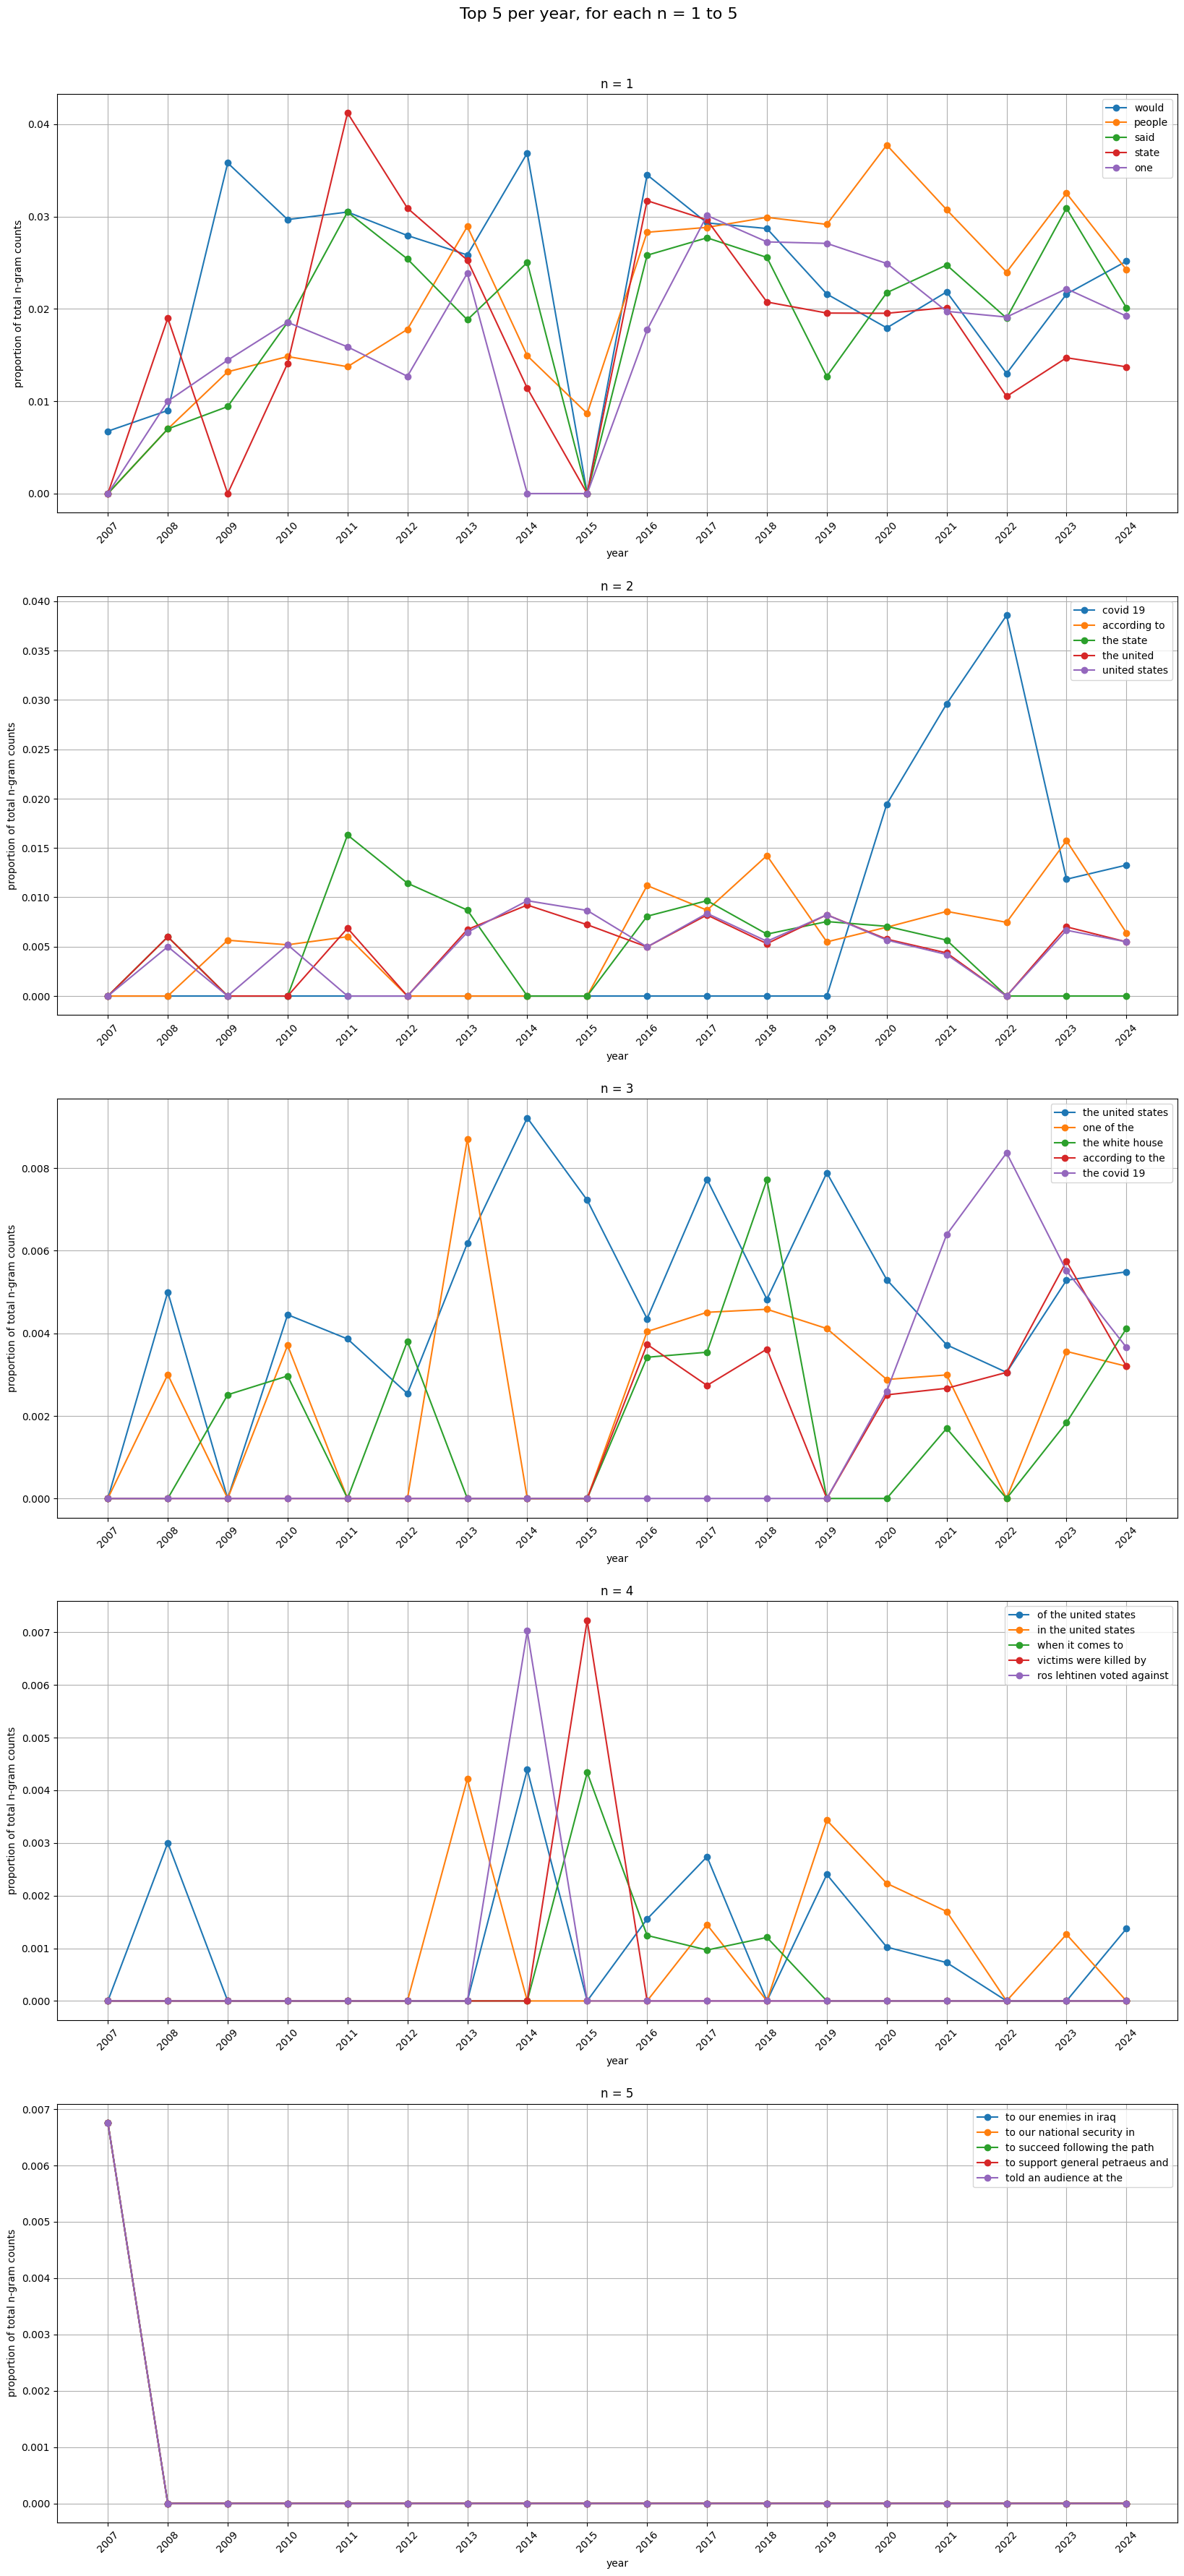

In [8]:
save_ngrams_over_years_plot(
    df=full_df,
    ranked_prop_df=full_ranked_proportion_df,
    num_ngrams=5,
    title_template="Top NUM_NGRAMS per year, for each n = 1 to 5",
    save_path="./visualization/ngrams/plots_over_time/full.png"
)

In [9]:
news_and_blog_df = get_full_df(
    misinfotext_path="./data/MisInfoText/Analysis_output/news_and_blog/MisInfoText_news_and_blog_ngrams.xlsx",
    fakespeak_path="./data/Fakespeak-ENG/Analysis_output/news_and_blog/Fakespeak_news_and_blog_ngrams.xlsx"
)
news_and_blog_df

,n,ngram_text,ngram_count,year,proportion
0,1,troops,3,2007,0.020270
1,1,senator,3,2007,0.020270
2,1,withdrawal,2,2007,0.013514
3,1,surge,2,2007,0.013514
4,1,new,2,2007,0.013514
...,...,...,...,...,...
125,5,to be classified as drug,2,2024,0.000915
126,5,they always put the truth,2,2024,0.000915
127,5,the truth in plain sight,2,2024,0.000915
128,5,the researchers pointed out that,2,2024,0.000915


In [10]:
news_and_blog_ranked_proportion_df = get_ranked_proportion_df(news_and_blog_df)
news_and_blog_ranked_proportion_df

,ngram_text,n,proportion
1365,would,1,0.416049
634,people,1,0.384464
751,said,1,0.342993
810,state,1,0.322154
597,one,1,0.302786
...,...,...,...
907,the delta case rate in,5,0.000485
1180,vaccine adverse event reporting system,5,0.000485
1429,you know taking an evening,5,0.000483
1433,you stop and think he,5,0.000483


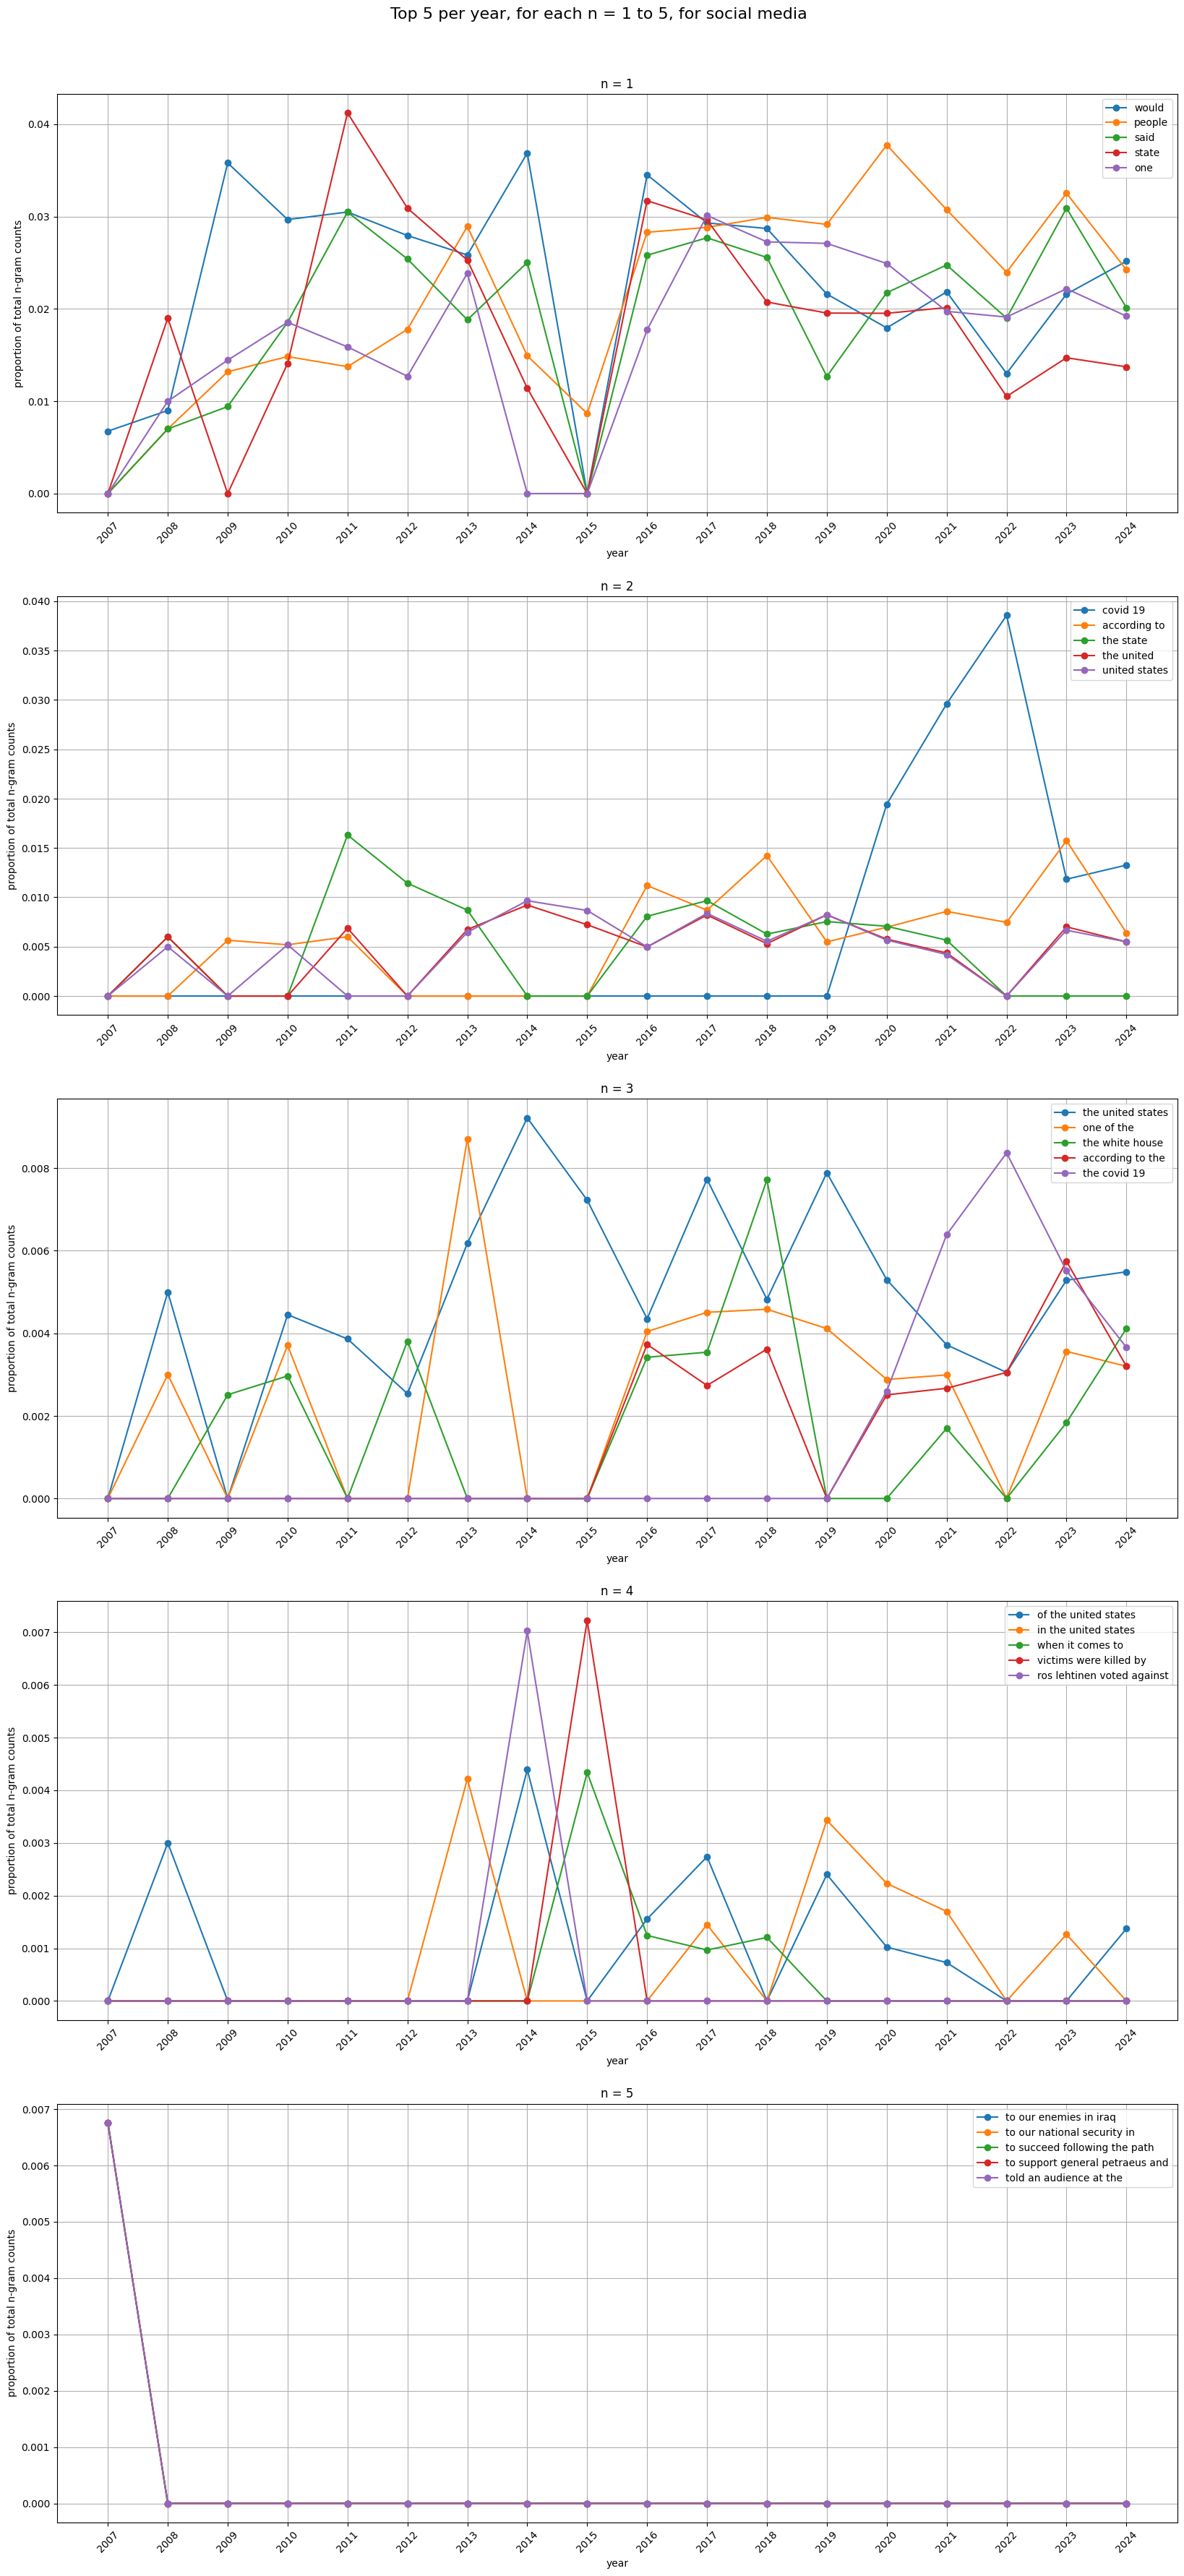

In [11]:
save_ngrams_over_years_plot(
    df=news_and_blog_df,
    ranked_prop_df=news_and_blog_ranked_proportion_df,
    num_ngrams=5,
    title_template="Top NUM_NGRAMS per year, for each n = 1 to 5, for social media",
    save_path="./visualization/ngrams/plots_over_time/news_and_blog.png"
)

In [12]:
press_release_df = get_full_df(
    misinfotext_path="./data/MisInfoText/Analysis_output/press_release/MisInfoText_press_release_ngrams.xlsx",
    fakespeak_path="./data/Fakespeak-ENG/Analysis_output/press_release/Fakespeak_press_release_ngrams.xlsx"
)
press_release_df

,n,ngram_text,ngram_count,year,proportion
0,1,troops,3,2007,0.020270
1,1,senator,3,2007,0.020270
2,1,withdrawal,2,2007,0.013514
3,1,surge,2,2007,0.013514
4,1,new,2,2007,0.013514
...,...,...,...,...,...
125,5,to be classified as drug,2,2024,0.000915
126,5,they always put the truth,2,2024,0.000915
127,5,the truth in plain sight,2,2024,0.000915
128,5,the researchers pointed out that,2,2024,0.000915


In [13]:
press_release_ranked_proportion_df = get_ranked_proportion_df(press_release_df)
press_release_ranked_proportion_df

,ngram_text,n,proportion
1365,would,1,0.416049
634,people,1,0.384464
751,said,1,0.342993
810,state,1,0.322154
597,one,1,0.302786
...,...,...,...
907,the delta case rate in,5,0.000485
1180,vaccine adverse event reporting system,5,0.000485
1429,you know taking an evening,5,0.000483
1433,you stop and think he,5,0.000483


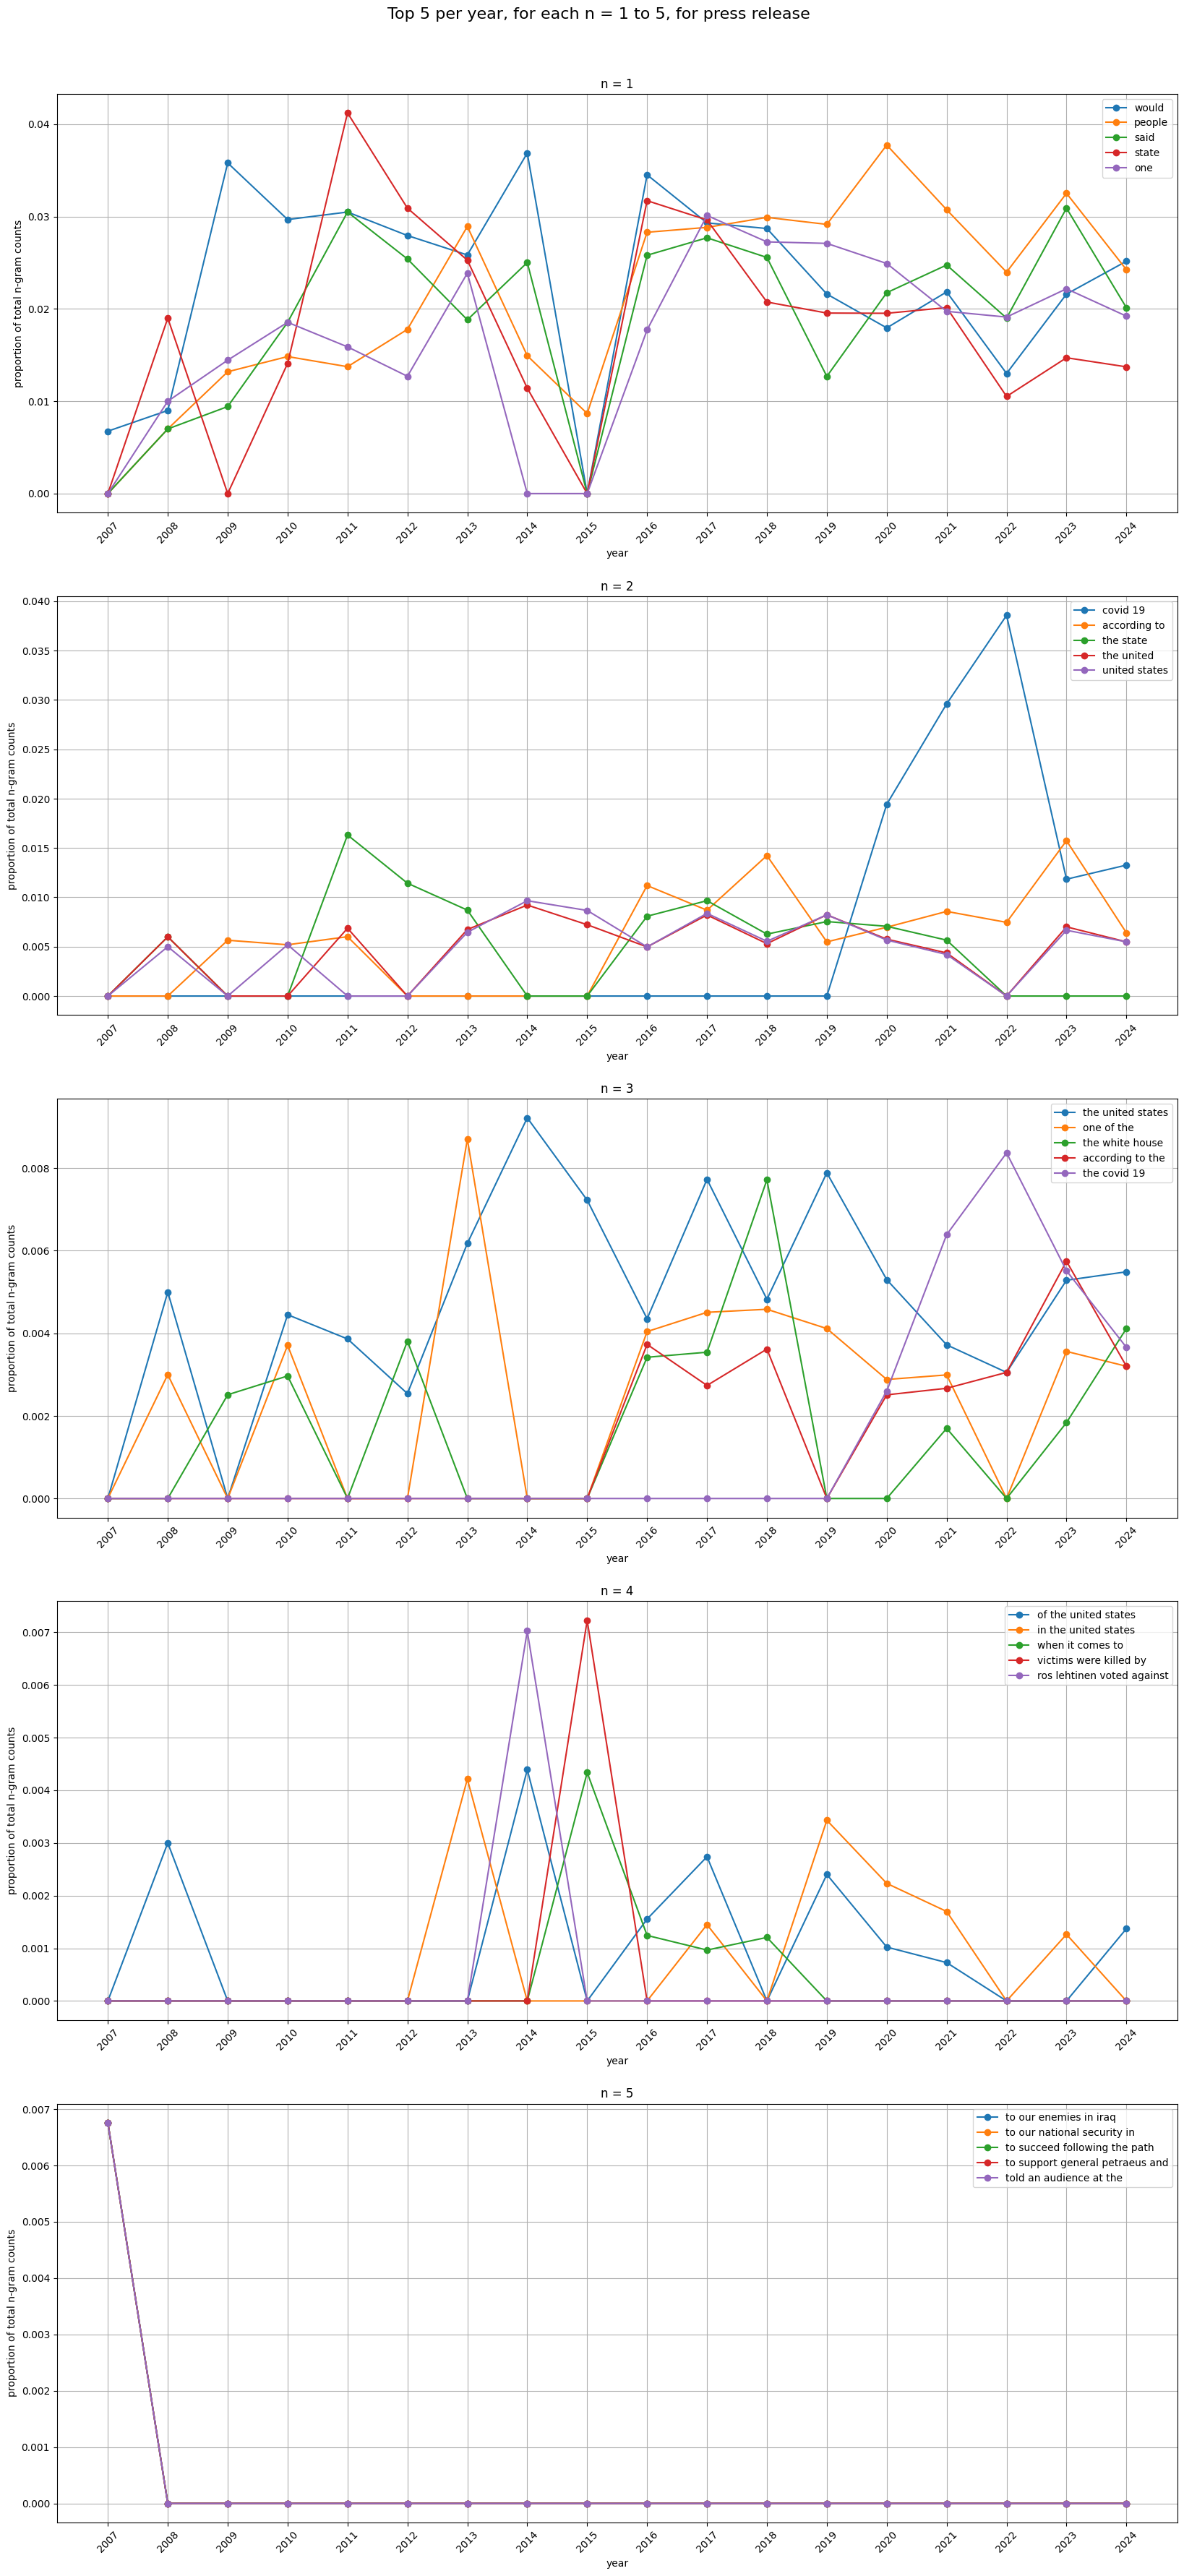

In [14]:
save_ngrams_over_years_plot(
    df=press_release_df,
    ranked_prop_df=press_release_ranked_proportion_df,
    num_ngrams=5,
    title_template="Top NUM_NGRAMS per year, for each n = 1 to 5, for press release",
    save_path="./visualization/ngrams/plots_over_time/press_release.png"
)

In [15]:
social_media_df = get_full_df(
    misinfotext_path="./data/MisInfoText/Analysis_output/social_media/MisInfoText_social_media_ngrams.xlsx",
    fakespeak_path="./data/Fakespeak-ENG/Analysis_output/social_media/Fakespeak_social_media_ngrams.xlsx"
)
social_media_df

,n,ngram_text,ngram_count,year,proportion
0,1,troops,3,2007,0.020270
1,1,senator,3,2007,0.020270
2,1,withdrawal,2,2007,0.013514
3,1,surge,2,2007,0.013514
4,1,new,2,2007,0.013514
...,...,...,...,...,...
125,5,to be classified as drug,2,2024,0.000915
126,5,they always put the truth,2,2024,0.000915
127,5,the truth in plain sight,2,2024,0.000915
128,5,the researchers pointed out that,2,2024,0.000915


In [16]:
social_media_ranked_proportion_df = get_ranked_proportion_df(social_media_df)
social_media_ranked_proportion_df

,ngram_text,n,proportion
1365,would,1,0.416049
634,people,1,0.384464
751,said,1,0.342993
810,state,1,0.322154
597,one,1,0.302786
...,...,...,...
907,the delta case rate in,5,0.000485
1180,vaccine adverse event reporting system,5,0.000485
1429,you know taking an evening,5,0.000483
1433,you stop and think he,5,0.000483


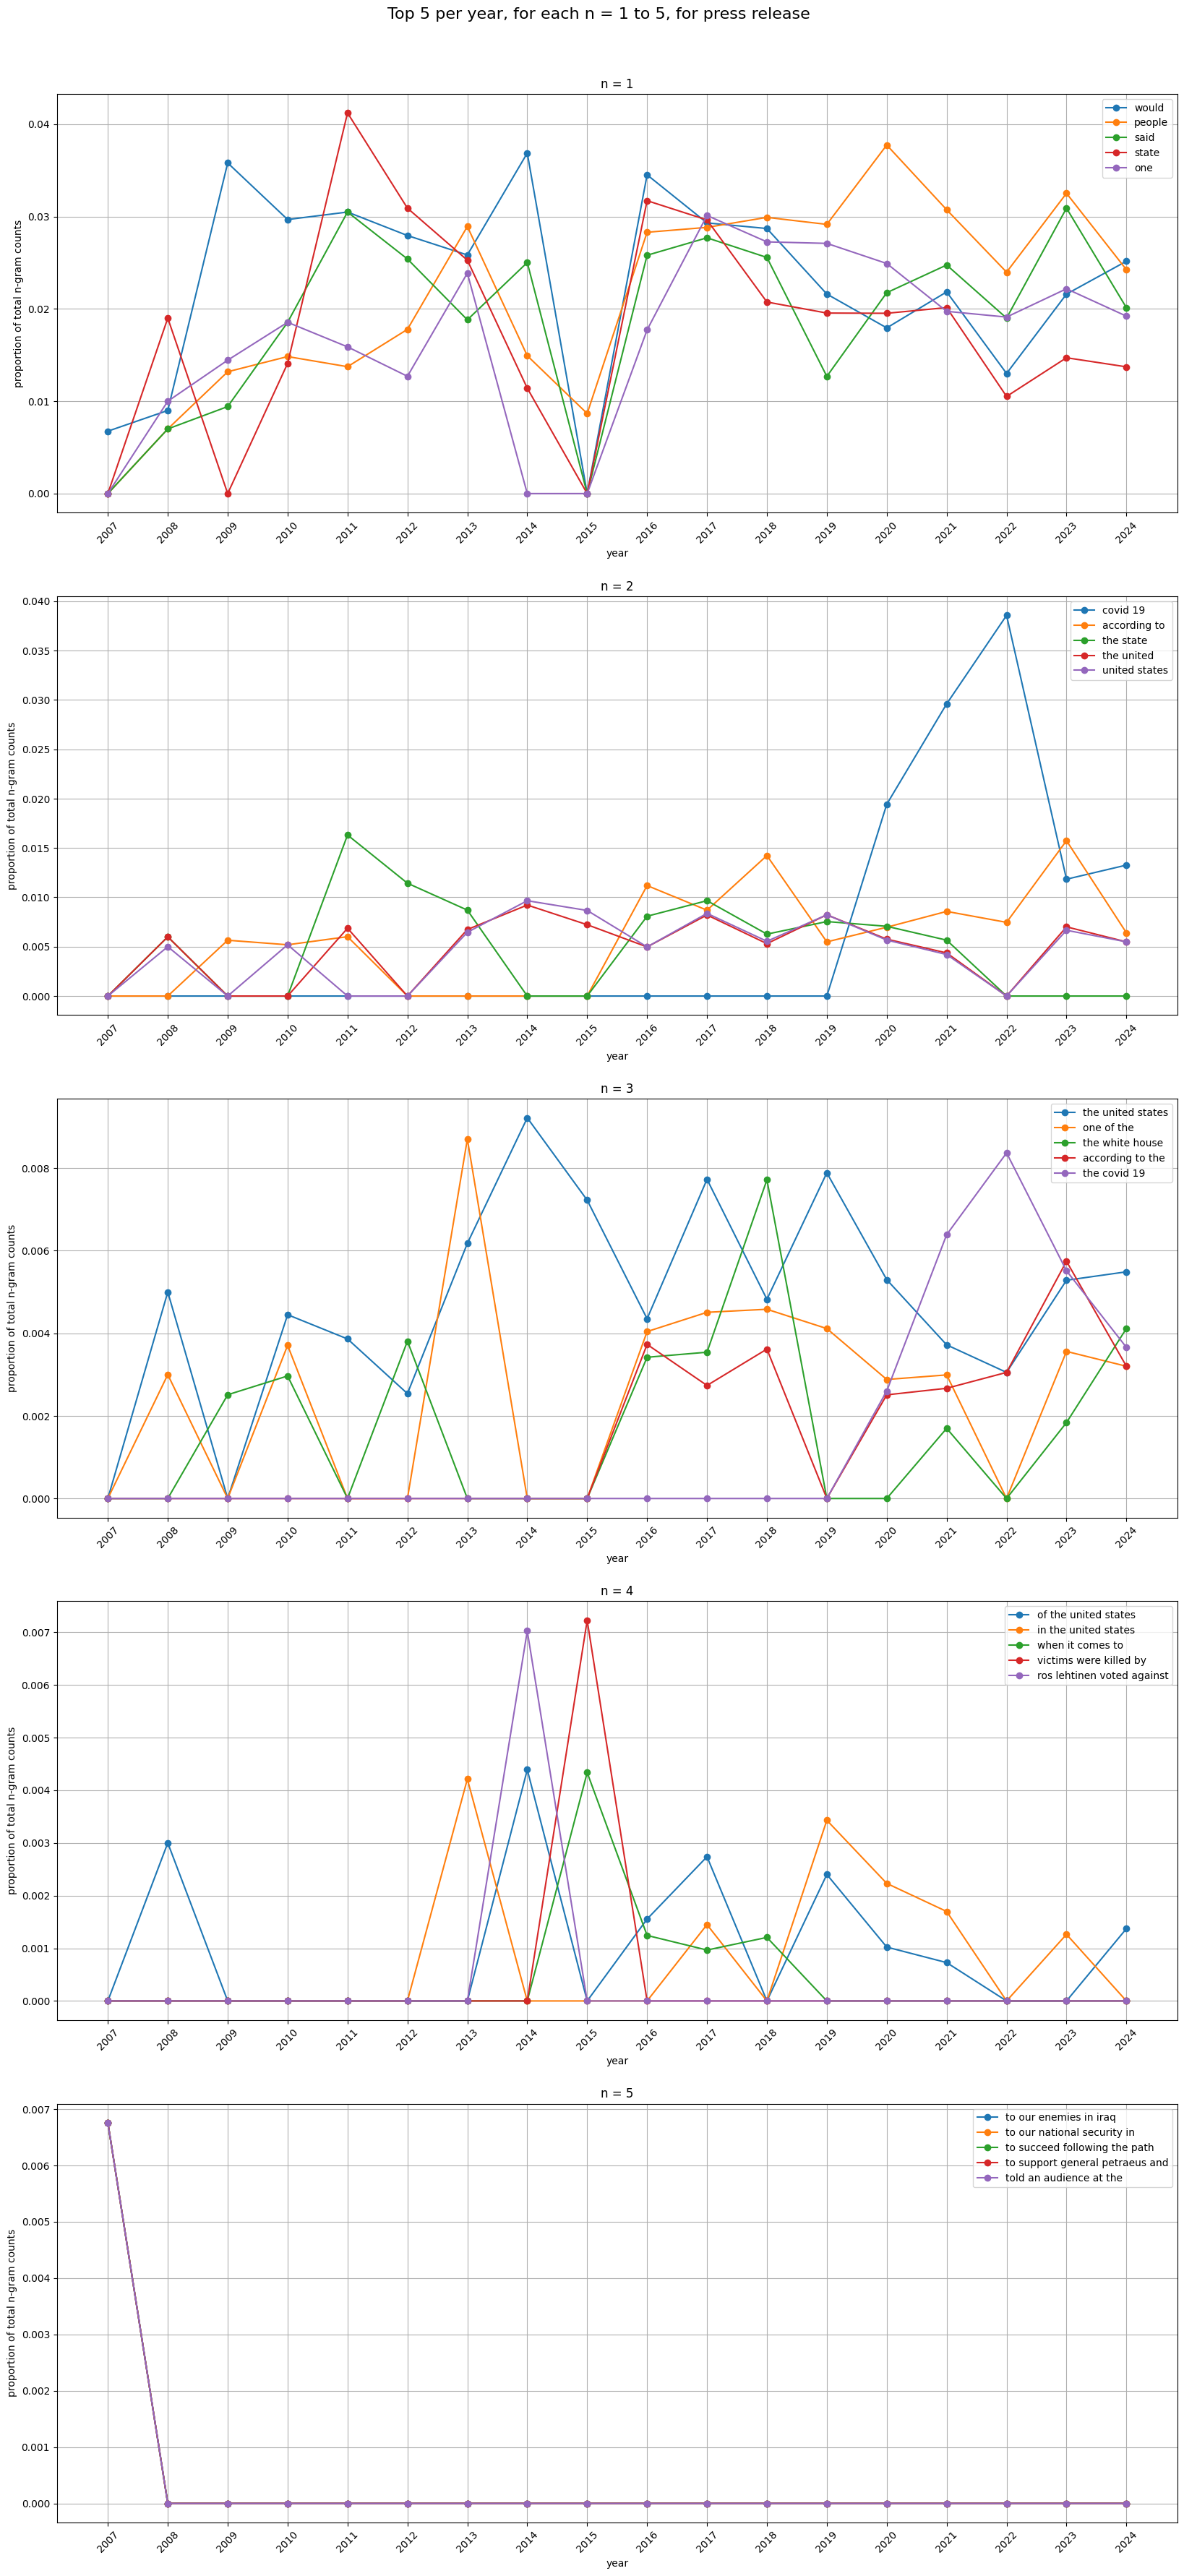

In [17]:
save_ngrams_over_years_plot(
    df=social_media_df,
    ranked_prop_df=social_media_ranked_proportion_df,
    num_ngrams=5,
    title_template="Top NUM_NGRAMS per year, for each n = 1 to 5, for press release",
    save_path="./visualization/ngrams/plots_over_time/social_media.png"
)